<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>
# <center>Los K Vecinos más Próximos</center>

En este laboratorio cargará un conjunto de datos de clientes, ajustará los datos y utilizará los k vecinos más próximos para predecir un punto de datos. ¿Pero qué es los **K Vecinos más Próximos**?

**K Vecinos más Próximos** es un algoritmo de aprendizaje supervisado. En él, los datos se “entrenan” con datos que corresponden a su clasificación. Cuando debe predecirse un punto, toma en cuenta los “k” puntos más próximos a él para determinar su clasificación.

### La siguiente es una representación visual del algoritmo de los k vecinos más próximos.

<img src = "https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

En este caso, tenemos datos de Clase A y de Clase B. Queremos predecir a qué clase pertenece la estrella (dato de prueba). Si consideramos un valor de k igual a 3 (los 3 datos más próximos), obtenemos como predicción que pertenece a la Clase B. Sin embargo, si consideramos un valor de k igual a 6, obtenemos como predicción que pertenece a la Clase A.

En este sentido, es importante considerar el valor de k. Pero esperamos que con este diagrama se haga una idea de qué es el algoritmo de los k vecinos más próximos. Considera los “k” vecinos (puntos) más próximos cuando predice la clasificación del punto de prueba.

Carguemos las bibliotecas que necesitamos.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Acerca del conjunto de datos

Imagine que un proveedor de servicios de telecomunicaciones ha segmentado su base de clientes por patrones de uso de servicios y los ha clasificado en cuatro grupos.  
Si pueden utilizarse datos demográficos para predecir la pertenencia a los grupos, la empresa puede personalizar las ofertas a posibles clientes de manera individual. Se trata de un problema de clasificación.

Eso significa que, dado un conjunto de datos, con etiquetas predefinidas, necesitamos armar un modelo que se utilizará para predecir la clase de un caso nuevo o desconocido.
El ejemplo se centra en usar datos demográficos, tales como región [region], edad [age] y estado civil [marital], para predecir patrones de uso.

El campo objetivo, llamado __custcat__, tiene cuatro valores posibles que corresponden a cuatro grupos de clientes, a saber:  
1- Servicios Básico [Basic Service],  
2- Servicio Electrónico [E-Service]   
3- Servicio Plus [Plus Service]  
4- Servicio Total [Total Service].

Nuestra meta es construir un clasificador para predecir la clase a la que pertenecen los casos desconocidos. Utilizaremos un tipo de clasificación particular que se llama el k vecino más próximo.  
Descarguemos el conjunto de datos. Usaremos !wget para descargar los datos de IBM Object Storage.


Descarguemos el conjunto de datos. Usaremos !wget para descargar los datos de IBM Object Storage.

In [2]:
!certutil -f -urlcache -split https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

****  Online  ****
  0000  ...
  90b8
CertUtil: -URLCache command completed successfully.


__¿Sabía usted?__ Al usar aprendizaje automático, es probable que trabaje con grandes conjuntos de datos. Como empresa, ¿dónde puede alojar sus datos? IBM ofrece una oportunidad inigualable para empresas, con 10 TB de almacenamiento en IBM Cloud Object Storage: [Regístrese ahora gratis](http://cocl.us/ML0101EN-IBM-Offer-CC)

### Carga de datos del archivo CSV

In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Representación visual y análisis de datos



#### Veamos cuántos de cada clase hay en nuestro conjunto de datos.

In [4]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### Hay 281 clientes del Servicio Plus [Plus Service], 266 del Básico [Basic Service], 236 del Total [Total Service] y 217 del Electrónico [E-Service].


Los datos se pueden explorar fácilmente mediante técnicas de representación visual:

array([[<AxesSubplot: title={'center': 'income'}>]], dtype=object)

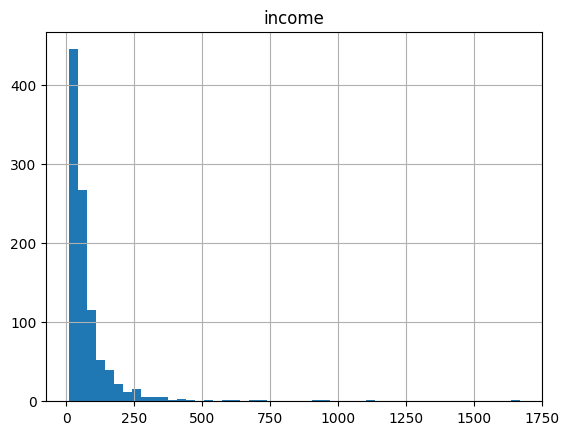

In [5]:
df.hist(column='income', bins=50)

### Conjunto de características

Definamos los conjuntos de características, X:

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Para usar la biblioteca scikit-learn, tenemos que convertir la hoja de datos de Pandas en un arreglo de NumPy:

In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [8]:
type(X)

numpy.ndarray

¿Cuáles son nuestras etiquetas?

In [9]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalización de los datos 

La estandarización de los datos nos da una media igual a cero y una varianza igual a uno; es recomendable, en especial para algoritmos como el de los k vecinos más próximos, basado en la distancia entre los casos:

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### División para entrenamiento y prueba 
La exactitud fuera de la muestra es el porcentaje de predicciones correctas que hace el modelo sobre datos con los cuales NO se ha entrenado al modelo. Es muy probable que hacer entrenamiento y prueba sobre el mismo conjunto de datos resulte en poca exactitud fuera de la muestra, debido a la probabilidad de que haya un exceso de ajuste.
Es importante que la exactitud fuera de la muestra de nuestros modelos sea alta, porque la finalidad de todo modelo es, por supuesto, realizar predicciones correctas de datos desconocidos. Entonces, ¿cómo podemos mejorar la exactitud fuera de la muestra? Una manera de hacerlo consiste en utilizar un enfoque de evaluación llamado división para entrenamiento y prueba. Este enfoque implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba, respectivamente, que son mutuamente excluyentes. Después de ello, se entrena con el conjunto de entrenamiento y se realizan pruebas con el conjunto de prueba.
Esto permite proporcionar una evaluación más exacta de la exactitud fuera de la muestra porque el conjunto de datos de prueba no forma parte del conjunto de datos que se han empleado para entrenar los datos. Es más realista para casos verdaderos.



In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Clasificación 

## Los K Vecinos más Próximos (K-NN)

#### Importación de la biblioteca

Clasificador que implementa el voto de los k vecinos más próximos.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

### Entrenamiento

Por ahora, iniciemos el algoritmo con k = 4:

In [13]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicción
Podemos usar el modelo para predecir el conjunto de prueba:

In [14]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Evaluación de la exactitud
En la clasificación de etiquetas múltiples, la función de, __accuracy classification score [puntuación de clasificación de exactitud]__ calcula la exactitud de un subconjunto de datos. Equivale a la función jaccard_similarity_score. En esencia, calcula cuántas de las etiquetas reales y predichas están en el conjunto de prueba.

In [15]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


## Práctica
¿Puede armar el modelo de nuevo, pero esta vez con k = 6?

In [16]:
# escriba su código aqui
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


Haga doble clic  __aquí__ para ver la solución.

<!-- Your answer is below:
    
    
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

-->

#### ¿Y qué sucede con otro k??
El k en este algoritmo es la cantidad de vecinos más próximos que se examinan. Debe especificarlo el usuario. ¿Y cómo elegimos el k correcto? La solución general es reservar parte de los datos para probar la exactitud del modelo. Luego se elige k = 1, se usa la parte del modelo separada para el entrenamiento y se calcula la exactitud de la predicción mediante el uso de todas las muestras del conjunto de prueba. Se repite este proceso, se aumenta k y se observa qué k es el mejor para el modelo.
Podemos calcular la exactitud de este algoritmo para diferentes k.

In [17]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

#### Representación gráfica de la exactitud para diferentes cantidades de vecinos

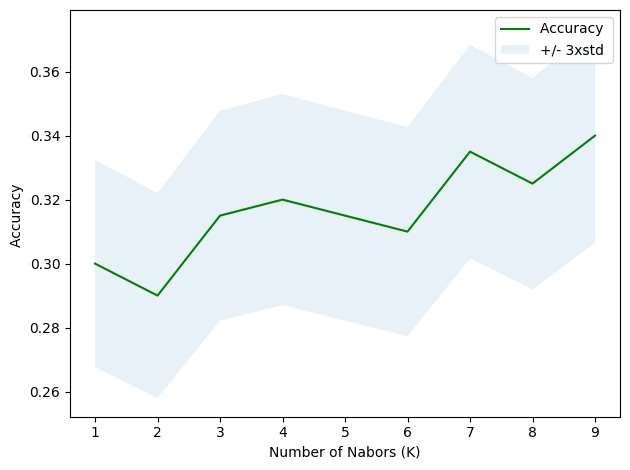

In [18]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [19]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


## ¿Desea saber más?

IBM SPSS Modeler es una plataforma de análisis completa que tiene muchos algoritmos de aprendizaje automático. Ha sido diseñada para aportar inteligencia predictiva a las decisiones que toman personas, grupos, sistemas, su empresa como conjunto. Este curso le permite acceder a una evaluación gratuita, disponible en este enlace: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

También puede usar Watson Studio para ejecutar estos cuadernos más rápido con conjuntos de datos más grandes. Watson Studio es la solución de IBM en la nube número uno para científicos de datos, construida por científicos de datos. Con los cuadernos Jupyter, RStudio, Apache Spark y otras bibliotecas populares preempaquetadas en la nube, Watson Studio hace posible que los científicos de datos colaboren en sus proyectos sin necesidad de instalar nada. Súmese hoy mismo a la comunidad de usuarios de Watson Studio, que crece cada día más, con una cuenta gratuita en [Watson Studio](https://cocl.us/ML0101EN_DSX)

### ¡Gracias por completar esta lección!

Cuaderno creado por: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). Este cuaderno y su código fuente se difunden de conformidad con los términos de la [Licenscia de MIT](https://bigdatauniversity.com/mit-license/).​